            Projet n°5 Catégorisez automatiquement des questions
Ce notebook représente l'analyse exploratoire des données
1. Importation des données
2. Exploration des données
3. Analyse en Composantes Principales
4. Sauvegarde des données

In [63]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [5]:
sns.set()

# <a name="C1">1. Importation des données</a>

In [6]:
data="./data/source/"
os.listdir(data)

['.DS_Store', 'QueryResults.csv', 'Select QueryResults.rtfd']

In [7]:
fn = data + "QueryResults.csv"
df = pd.read_csv(fn,sep=",")

In [8]:
df.head(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Will this type of filtering work in a belongs_...,"<p>For a recruitment application, I have a use...",<ruby-on-rails>,20561561,0,27,NaN,1
1,"How to remove the ""border-radius"" of the navba...",<p>Everything is pretty much in the question. ...,<twitter-bootstrap><navbar><css>,20561563,-1,7803,NaN,1
2,TypeError: unsupported operand type(s) for *: ...,<p>I am trying to debug some Python (with next...,<python>,20561567,1,5569,NaN,1
3,How to put divider as a image next to button,<p>I was wanted to put one divider just next t...,<android><layout>,20561568,0,86,NaN,2
4,Android ArrayIndexOutOfBoundsException in inse...,<p>I'm getting an error in inserting rows to m...,<java><php><android><mysql><sqlite>,20561570,0,150,NaN,3
5,Sending parameters to java via c++,<p>My java class has a static function defined...,<java><c++><java-native-interface>,20561572,1,5201,0.0,1
6,EF CodeFirst mapping enum with custom value ma...,<p>I need to create an application that is com...,<c#><entity-framework><enums><ef-code-first>,20561573,1,1205,NaN,1
7,can I integrate anylogic with a .net application,<ol>\n<li>can I integrate any logic simulation...,<.net><integration><simulation><anylogic>,58690708,-3,145,NaN,2
8,JTextArea - selection behavior on double / tri...,<p><strong>The problem:</strong> when you doub...,<java><swing><selection><jtextarea><double-click>,58690711,3,424,0.0,1
9,Reading in doubles gives back zeros instead of...,<p>I am trying to read in a text file with acc...,<java><eclipse><double>,58690713,0,43,NaN,3


In [9]:
df.tail(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
49990,Prism and nested UserControl,<p>I have been using Prism for two days and ha...,<user-controls><prism>,308759,2,2454,NaN,0
49991,What are some ways to protect emails on websit...,<p>I'm creating a public internet facing websi...,<email><protection><spam>,308772,12,15647,0.0,14
49992,Oracle dbms_scheduler - react to change of sys...,<p>I've got a <em>dbms_scheduler</em>-Job runn...,<oracle><dbms-scheduler>,308793,2,1056,NaN,1
49993,Can I use Ajax and ASP.NET Tracing on the same...,<p>I'm using an Ajax update panel and have rec...,<asp.net><ajax><trace>,308798,1,695,NaN,1
49994,Silverlight Unit Testing,"<p>I'm using the <a href=""http://code.msdn.mic...",<silverlight><unit-testing>,308802,7,1054,0.0,4
49995,What is model driven development good for?,"<p>Microsoft, of Cairo fame, is working on Osl...",<code-generation><mda><oslo><mdd>,308803,4,1099,0.0,3
49996,MySQL: how to get the list of tables using ODBC,<p>I am connecting to a MySQL DB trough a term...,<mysql><odbc>,308809,2,3360,NaN,1
49997,OSGi/Felix Declarative Services: How to filter...,<p>I am using Apache Felix and its Declarative...,<dependency-injection><annotations><osgi><apac...,308813,4,4753,NaN,2
49998,Rewritepath and IIS Integrated Mode,<p>I have big issue with url-rewriting for IIS...,<asp.net><iis-7><url-rewriting>,308820,1,2127,NaN,3
49999,How to specify the exact number of occurance o...,<p>I have to define the grammar of a file like...,<java><parsing><antlr><grammar><antlrworks>,308823,2,1322,NaN,2


In [10]:
df.sample(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
1135,Best practices for building Flash video player,<p>We have a custom-built Flash-based video pl...,<flash><video>,7674,5,2202,NaN,4
45849,How do I bind collection attributes to a form ...,<p>I'm trying to bind one of my model objects ...,<java><spring><jakarta-ee><spring-mvc>,284368,17,36619,0.0,6
9402,How do I make a StreamImageSource into a byte []?,<p>I am trying to make a StreamImageSource int...,<c#><xamarin><xamarin.forms>,37970379,1,2625,NaN,1
48073,Stacked 3d bar chart with matplotlib,<p>i worked on a simple 3d bar chart using the...,<python><matplotlib><charts><3d>,38086972,12,6755,0.0,1
6572,MS-Access design pattern for last value for a ...,<p>It's common to have a table where for examp...,<ms-access>,47413,3,3394,NaN,8
24195,UIButton not responding after animation,<p><strong>I would prefer first download the p...,<ios><objective-c><uibutton><ibaction><cgaffin...,18993151,5,4370,0.0,3
19472,How to access a particular element from JSTL F...,<p>I'm trying to make a booking website. On my...,<javascript><jsp><geolocation><jstl>,57136058,0,179,NaN,1
6403,exporting runnable jar through eclipse - proje...,<p>i'm using jogl native jars ( as explained -...,<eclipse><jar><native><runnable><jogl>,18933516,0,1786,NaN,2
47929,freeing shared resources in Android app,<p>I'm writing an Android app that has both an...,<java><android><garbage-collection><destructor>,19071340,3,377,0.0,3
6817,Continuously capture packets in Pyshark,"<p>This <a href=""https://medium.com/python-pan...",<python-3.x><sniffing><pyshark>,57099396,1,5129,0.0,1


# <a name="C2">2. Analyse des données</a>

## <a name="C2.1">2.1 Structure</a>

In [11]:
df.shape

(50000, 8)

In [12]:
df.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  15969 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [14]:
df.dtypes.value_counts()

int64      4
object     3
float64    1
dtype: int64

In [15]:
df.nunique()

Title            49996
Body             49996
Tags             37148
Id               50000
Score              547
ViewCount        11995
FavoriteCount        2
AnswerCount         70
dtype: int64

In [16]:
tmp = df.nunique()
tmp

Title            49996
Body             49996
Tags             37148
Id               50000
Score              547
ViewCount        11995
FavoriteCount        2
AnswerCount         70
dtype: int64

In [17]:
tmp[tmp<10]

FavoriteCount    2
dtype: int64

In [18]:
tmp[tmp>100]

Title        49996
Body         49996
Tags         37148
Id           50000
Score          547
ViewCount    11995
dtype: int64

## <a name="C2.2">2.2 Champs vides et dupliqués</a>

In [21]:
df.isna().sum()

Title                0
Body                 0
Tags                 0
Id                   0
Score                0
ViewCount            0
FavoriteCount    34031
AnswerCount          0
dtype: int64

In [22]:
df.isna().mean()

Title            0.00000
Body             0.00000
Tags             0.00000
Id               0.00000
Score            0.00000
ViewCount        0.00000
FavoriteCount    0.68062
AnswerCount      0.00000
dtype: float64

In [23]:
df.isna().mean().sort_values()

Title            0.00000
Body             0.00000
Tags             0.00000
Id               0.00000
Score            0.00000
ViewCount        0.00000
AnswerCount      0.00000
FavoriteCount    0.68062
dtype: float64

<AxesSubplot:>

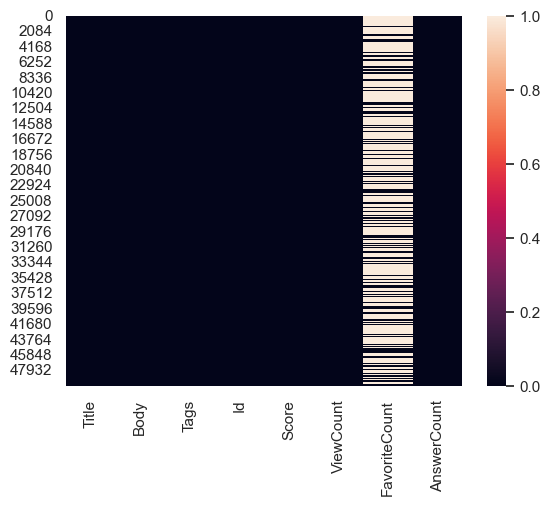

In [24]:
sns.heatmap(df.isna())

In [25]:
df.duplicated().sum()

0

In [27]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount'],
      dtype='object')

In [28]:
df.Title.duplicated().sum()

4

In [34]:
idx = df.duplicated(subset='Title',keep=False)
df.loc[idx,].sort_values("Title")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
12849,How does a program ask for administrator privi...,<p>I am developing an application using vb.net...,<vb.net><privileges>,90674,8,23558,0.0,5
12854,How does a program ask for administrator privi...,<p>I am working on a small application in VB.N...,<windows><vb.net><privileges>,90702,3,9409,0.0,4
8959,Unable To set row visible false of a datagridview,<p>I have a <code>DataGridView</code> where I ...,<c#><datagridview><datasource>,18942017,32,41514,0.0,8
9974,Unable To set row visible false of a datagridview,<p>I had a DatagridView<br/>\nI had set its da...,<c#>,18945957,-1,849,NaN,1
23021,Using Microsoft SMS Sender to send out smses i...,<p>I understand that we can use SMS Sender in ...,<sms><bulksms>,156543,0,4234,0.0,2
28072,Using Microsoft SMS Sender to send out smses i...,<p>I understand that we can use SMS Sender in ...,<windows><sms>,189876,0,2335,NaN,2
43502,WPF TreeView Binding,<p>I've got a class with Parent and Children p...,<.net><wpf><linq><entity-framework><data-binding>,272854,8,33482,0.0,1
43781,WPF TreeView Binding,<p>I've got a class with Parent and Children p...,<.net><wpf><linq><entity-framework><data-binding>,273200,0,1437,0.0,1


In [32]:
df.Body.duplicated().sum()

4

In [36]:
idx = df.duplicated(subset='Body',keep=False)
df.loc[idx,].sort_values("Body")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
13011,Advantages of VS 2008 over VS 2005,<p>Could somebody please name a few. I could ...,<visual-studio><ide>,90918,2,609,NaN,7
13012,Benefits of SQL Server 2005 over 2000,<p>Could somebody please name a few. I could ...,<sql-server><sql-server-2005><sql-server-2000>,90920,3,1629,NaN,12
36142,Netbeans - Turn off - wavy red underlines - How?,<p>How can I turn off the wavy red underlines ...,<netbeans><settings>,236733,7,5428,0.0,2
36661,Netbeans 6.1 (!5.5.1) - Turn off - wavy red un...,<p>How can I turn off the wavy red underlines ...,<netbeans6.1>,237342,1,899,NaN,2
15007,How to create an automatic form generator base...,<p>I am trying to create a form which will gen...,<javascript><html><forms><input>,57124087,1,651,0.0,1
17583,Automating Javascript form creation from user ...,<p>I am trying to create a form which will gen...,<javascript><html><forms><user-input>,57132246,0,48,NaN,1
1259,Looking for sample code to test IoT Hub DM API,<p>Where can I find sample code for implementi...,<azure><iot>,37945790,-2,63,0.0,1
15052,Device communication behind gateway,<p>Where can I find sample code for implementi...,<device><device-management>,37987906,0,44,NaN,1


## <a name="C2.3">2.3 Inspection de données</a>

In [37]:
df.describe(include=np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,15969.000000,50000.000000
mean,2.918343e+07,11.377720,1.114160e+04,0.000063,2.421600
std,2.084242e+07,113.985529,8.748407e+04,0.007913,3.921714
min,1.276000e+03,-14.000000,6.000000e+00,0.000000,0.000000
25%,1.892935e+07,0.000000,1.730000e+02,0.000000,1.000000
50%,3.794922e+07,1.000000,7.020000e+02,0.000000,1.000000
75%,4.085676e+07,3.000000,2.705000e+03,0.000000,3.000000
max,5.975889e+07,7320.000000,4.778477e+06,1.000000,296.000000


In [39]:
df.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49996,49996,37148
top,Unable To set row visible false of a datagridview,<p>Where can I find sample code for implementi...,<javascript>
freq,2,2,281


## <a name="C2.4">2.4 Nettoyage</a>

In [42]:
# restriction aux données cibles
cols = ["Title", 'Tags']
df=df[cols]

In [43]:
df

,Title,Tags
0,Will this type of filtering work in a belongs_...,<ruby-on-rails>
1,"How to remove the ""border-radius"" of the navba...",<twitter-bootstrap><navbar><css>
2,TypeError: unsupported operand type(s) for *: ...,<python>
3,How to put divider as a image next to button,<android><layout>
4,Android ArrayIndexOutOfBoundsException in inse...,<java><php><android><mysql><sqlite>
...,...,...
49995,What is model driven development good for?,<code-generation><mda><oslo><mdd>
49996,MySQL: how to get the list of tables using ODBC,<mysql><odbc>
49997,OSGi/Felix Declarative Services: How to filter...,<dependency-injection><annotations><osgi><apac...
49998,Rewritepath and IIS Integrated Mode,<asp.net><iis-7><url-rewriting>


In [44]:
# Drop NaN
df.isna().mean()

Title    0.0
Tags     0.0
dtype: float64

In [45]:
# Drop duplicated
idx = df.duplicated(subset='Title',keep='first')
df.loc[idx,].sort_values("Title")

,Title,Tags
12854,How does a program ask for administrator privi...,<windows><vb.net><privileges>
9974,Unable To set row visible false of a datagridview,<c#>
28072,Using Microsoft SMS Sender to send out smses i...,<windows><sms>
43781,WPF TreeView Binding,<.net><wpf><linq><entity-framework><data-binding>


In [48]:
df.drop_duplicates(subset='Title', keep='first', inplace =True)

/var/folders/dz/v9mhgdhn03n30_kgvk_0mcfc0000gn/T/ipykernel_2164/1041986592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='Title', keep='first', inplace =True)


# <a name="C3">3. Exploration des données</a>

## <a name="C3.1">3.1 Target</a>

In [49]:
df.describe()

,Title,Tags
count,49996,49996
unique,49996,37146
top,Will this type of filtering work in a belongs_...,<javascript>
freq,1,281


In [51]:
df.Tags.value_counts()

<javascript>                                   281
<java>                                         251
<python>                                       238
<html><css>                                    216
<javascript><jquery>                           209
                                              ... 
<wpf><xaml><data-binding><textbox>               1
<c#><variables><generics><types><field>          1
<iphone><keyboard>                               1
<ruby><file><csv><newline><line-endings>         1
<java><parsing><antlr><grammar><antlrworks>      1
Name: Tags, Length: 37146, dtype: int64

In [52]:
df.Tags.value_counts(normalize=True)

<javascript>                                   0.00562
<java>                                         0.00502
<python>                                       0.00476
<html><css>                                    0.00432
<javascript><jquery>                           0.00418
                                                ...   
<wpf><xaml><data-binding><textbox>             0.00002
<c#><variables><generics><types><field>        0.00002
<iphone><keyboard>                             0.00002
<ruby><file><csv><newline><line-endings>       0.00002
<java><parsing><antlr><grammar><antlrworks>    0.00002
Name: Tags, Length: 37146, dtype: float64

## <a name="C3.2">3.2 Longueur des titres</a>

In [54]:
df.describe(include='object')

,Title,Tags
count,49996,49996
unique,49996,37146
top,Will this type of filtering work in a belongs_...,<javascript>
freq,1,281


In [55]:
df.Title.apply(lambda i : len(i))

0        61
1        71
2        72
3        44
4        65
         ..
49995    42
49996    47
49997    72
49998    35
49999    65
Name: Title, Length: 49996, dtype: int64

In [56]:
tmp = df.Title.str.len()

/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

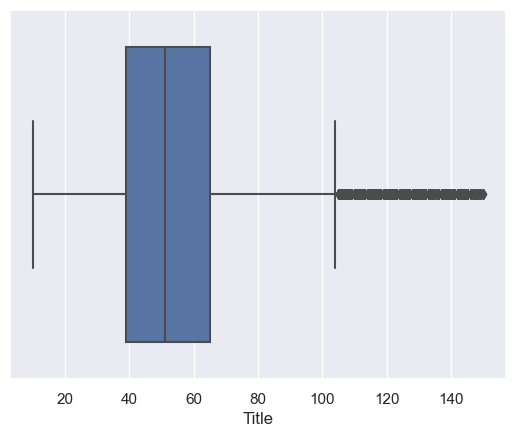

In [57]:
sns.boxplot(tmp)

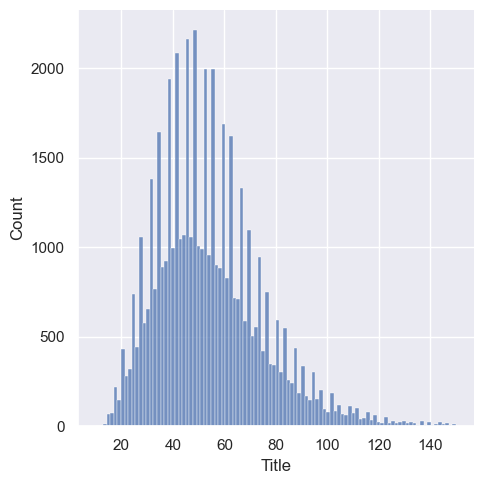

In [58]:
sns.displot(tmp)

In [59]:
df["_len_txt"] = tmp

/var/folders/dz/v9mhgdhn03n30_kgvk_0mcfc0000gn/T/ipykernel_2164/3091308944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_txt"] = tmp


In [60]:
df

,Title,Tags,_len_txt
0,Will this type of filtering work in a belongs_...,<ruby-on-rails>,61
1,"How to remove the ""border-radius"" of the navba...",<twitter-bootstrap><navbar><css>,71
2,TypeError: unsupported operand type(s) for *: ...,<python>,72
3,How to put divider as a image next to button,<android><layout>,44
4,Android ArrayIndexOutOfBoundsException in inse...,<java><php><android><mysql><sqlite>,65
...,...,...,...
49995,What is model driven development good for?,<code-generation><mda><oslo><mdd>,42
49996,MySQL: how to get the list of tables using ODBC,<mysql><odbc>,47
49997,OSGi/Felix Declarative Services: How to filter...,<dependency-injection><annotations><osgi><apac...,72
49998,Rewritepath and IIS Integrated Mode,<asp.net><iis-7><url-rewriting>,35


## <a name="C3.3">3.3 Nombre de tags</a>

In [78]:
doc = df.Tags.sample(1)
doc = doc.values[0]
doc

'<ruby><regex>'

In [79]:
tokens = word_tokenize(doc)
tokens

['<', 'ruby', '>', '<', 'regex', '>']

In [80]:
tokens = [w for w in tokens if w not in ["<", ">"]]
tokens

['ruby', 'regex']

In [81]:
print (f"Nb tokens {len(tokens)}, Nb tokens uniques : {len(set(tokens))}")

Nb tokens 2, Nb tokens uniques : 2


In [118]:
def tokenit(doc):
    doc = doc.lower()
    tokens = word_tokenize(doc)
    tokens = [w for w in tokens if w not in ["<", ">"]]
    return len(set(tokens))

In [120]:
df["_nb_tags"] = df.Tags.apply(tokenit)

/var/folders/dz/v9mhgdhn03n30_kgvk_0mcfc0000gn/T/ipykernel_2164/4258062700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_nb_tags"] = df.Tags.apply(tokenit)


In [121]:
df

,Title,Tags,_len_txt,_nb_tags
0,Will this type of filtering work in a belongs_...,<ruby-on-rails>,61,1
1,"How to remove the ""border-radius"" of the navba...",<twitter-bootstrap><navbar><css>,71,3
2,TypeError: unsupported operand type(s) for *: ...,<python>,72,1
3,How to put divider as a image next to button,<android><layout>,44,2
4,Android ArrayIndexOutOfBoundsException in inse...,<java><php><android><mysql><sqlite>,65,5
...,...,...,...,...
49995,What is model driven development good for?,<code-generation><mda><oslo><mdd>,42,4
49996,MySQL: how to get the list of tables using ODBC,<mysql><odbc>,47,2
49997,OSGi/Felix Declarative Services: How to filter...,<dependency-injection><annotations><osgi><apac...,72,4
49998,Rewritepath and IIS Integrated Mode,<asp.net><iis-7><url-rewriting>,35,3


<AxesSubplot:xlabel='_nb_tags'>

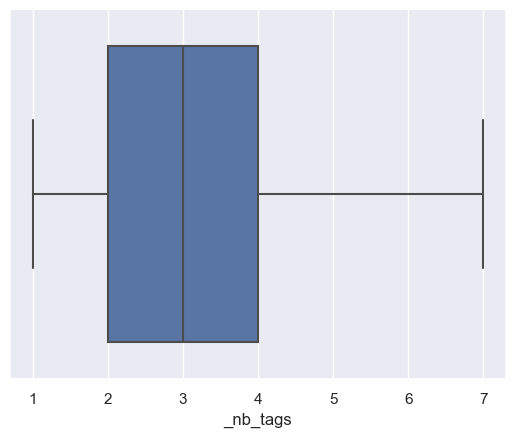

In [125]:
sns.boxplot(data=df, x="_nb_tags")

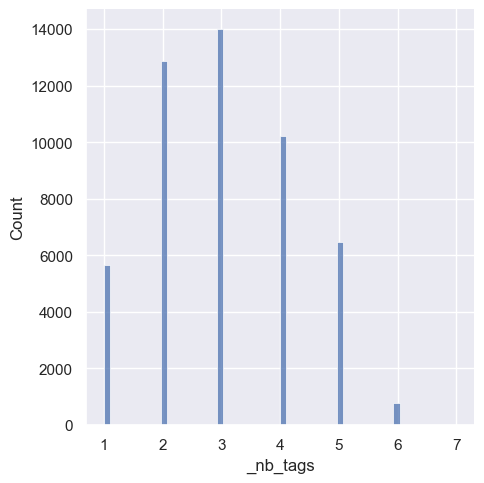

In [126]:
sns.displot(data=df, x="_nb_tags")

## <a name="C3.4">3.4 Analyse multivariée</a>

In [127]:
corr = df.corr()

<AxesSubplot:>

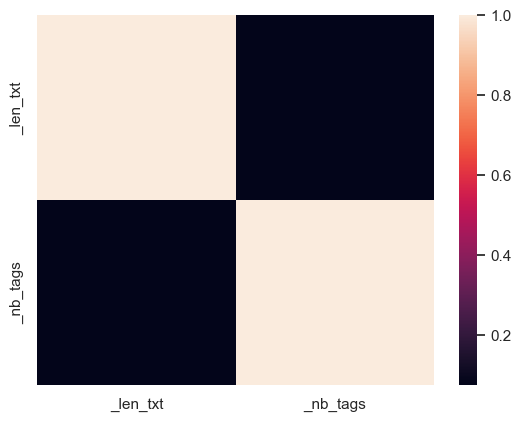

In [128]:
sns.heatmap(corr)

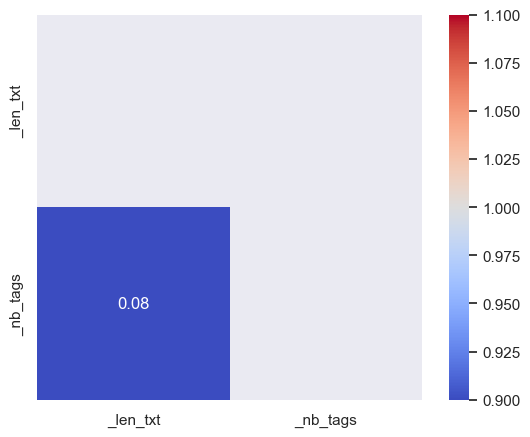

In [129]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax = sns.heatmap(corr,mask=mask, vmin=1, vmax=1, cmap='coolwarm', annot=True, fmt=('.2f'), square=True)

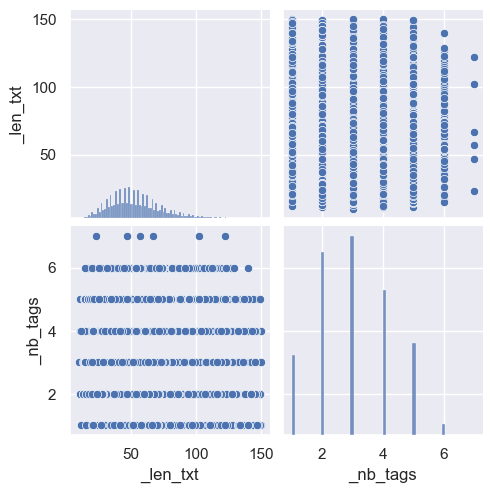

In [130]:
sns.pairplot(df)

In [82]:
df.sort_values("_len_txt").head(10)

,text,target,_len_txt
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
4971,Meltdown,0,8
24,LOOOOOOL,0,8
3670,fatality,0,8
30,The end!,0,8
28,Cooool :),0,9
3667,Fatality!,0,9
6705,Thunder???,0,10


In [137]:
df.sort_values("_nb_tags", ascending=False).head(10)

,Title,Tags,_len_txt,_nb_tags
49871,Facebook API - getting friend list with detail...,<c#><facebook><facebook-graph-api><facebook-c#...,57,7
24047,How do I group together radio buttons that are...,<winforms><c#-4.0><radio-button><custom-contro...,67,7
43117,Linq Many to Many query,<linq><entity-framework><c#-4.0><ef-code-first...,23,7
22035,Any Risk in Using Static Method in IDisposable?,<.net><c#-4.0><memory-management><static-metho...,47,7
15614,Transaction count after EXECUTE a mismatching ...,<asp.net><sql-server><c#-4.0><transactions><sq...,122,7
36596,using paypal DoDirectPayment method via HttpWe...,<wcf><c#-4.0><paypal><paypal-ipn><paypal-sandbox>,102,7
4235,Accessing static fields in XAML,<c#><.net><wpf><silverlight><xaml>,31,6
33621,Loading the TypeScript compiler into ClearScri...,<c#><.net><typescript><windows-scripting><clea...,90,6
13277,What's the best way to send a file over a netw...,<c#><.net><ftp><tcp><data-transfer>,59,6
34349,Validating and Extracting XML record by record...,<c#><.net><xml><linq><linq-to-xml>,60,6


In [138]:
df.drop(columns=["_len_txt", "_nb_tags"], inplace=True)

/var/folders/dz/v9mhgdhn03n30_kgvk_0mcfc0000gn/T/ipykernel_2164/2748062120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["_len_txt", "_nb_tags"], inplace=True)


In [139]:
df

,Title,Tags
0,Will this type of filtering work in a belongs_...,<ruby-on-rails>
1,"How to remove the ""border-radius"" of the navba...",<twitter-bootstrap><navbar><css>
2,TypeError: unsupported operand type(s) for *: ...,<python>
3,How to put divider as a image next to button,<android><layout>
4,Android ArrayIndexOutOfBoundsException in inse...,<java><php><android><mysql><sqlite>
...,...,...
49995,What is model driven development good for?,<code-generation><mda><oslo><mdd>
49996,MySQL: how to get the list of tables using ODBC,<mysql><odbc>
49997,OSGi/Felix Declarative Services: How to filter...,<dependency-injection><annotations><osgi><apac...
49998,Rewritepath and IIS Integrated Mode,<asp.net><iis-7><url-rewriting>


In [140]:
df.to_csv("data/cleaned/df_cleaned.csv", index=False)

## <a name="C3.5">3.5 Exploration du corpus</a>

In [141]:
# print n random documents
df_samp = df.sample(20)
df_samp

,Title,Tags
1125,Where can I find some good WS-Security introdu...,<web-services><ws-security>
10515,The same process in the process pool will be e...,<python>
40246,Apache modrewrite .htaccess,<apache><.htaccess><mod-rewrite><url-rewriting>
33929,"HTTP session tracking through base URL ""resour...",<http><https><session-state><sessiontracking>
46518,non-uniform behavior of flexbox in firefox and...,<html><css><google-chrome><firefox><flexbox>
27764,"Inline Styles not rendering in IE7,8,9",<html><css><internet-explorer><background><inl...
23293,Facebook realtime updates certificate verify f...,<facebook><ssl><updates>
46657,Can't proceed to next routes because my ajax k...,<php><jquery><ajax><laravel><twitter-bootstrap>
40783,How to skip specific line from csv file using ...,<php><csv><fgetcsv>
49069,How can I use Digest Authorisation with my ASP...,<asp.net><digest-authorisation>


In [143]:
for idx, ser in df_samp.iterrows():
    txt_1 = f"tags : {ser['Tags']}\n" 
    print (txt_1 + ser['Title']+'...'+"\n\n")

tags : <web-services><ws-security>
Where can I find some good WS-Security introductions and tutorials?...


tags : <python>
The same process in the process pool will be executed multiple times...


tags : <apache><.htaccess><mod-rewrite><url-rewriting>
Apache modrewrite .htaccess...


tags : <http><https><session-state><sessiontracking>
HTTP session tracking through base URL "resource"?...


tags : <html><css><google-chrome><firefox><flexbox>
non-uniform behavior of flexbox in firefox and chrome?...


tags : <html><css><internet-explorer><background><inline-styles>
Inline Styles not rendering in IE7,8,9...


tags : <facebook><ssl><updates>
Facebook realtime updates certificate verify failed...


tags : <php><jquery><ajax><laravel><twitter-bootstrap>
Can't proceed to next routes because my ajax keep return 422 status...


tags : <php><csv><fgetcsv>
How to skip specific line from csv file using fgetcsv function...


tags : <asp.net><digest-authorisation>
How can I use Digest Authorisatio

In [147]:
df_1 = df[df.Tags == "<java>"]
df_1

,Title,Tags
119,Why does this simple code throw ArrayIndexOutO...,<java>
351,How to write 1 to 1000 numbers into text file ...,<java>
475,Error: Incompatible types when attempting to r...,<java>
567,JApplet menus are not visible,<java>
819,Ensuring that every class that implements an i...,<java>
...,...,...
49590,Java and switch case,<java>
49633,Not able to give inputs to a function java.,<java>
49688,How I can implements method from one class in ...,<java>
49704,"Java: cannot find symbol ""file.asm"".split(""."")",<java>
